<a href="https://colab.research.google.com/github/MartinSantaGitHub/python-ml-course/blob/master/code/T11%20-%201%20-%20TensorFlow101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Tensor Flow

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import os
import numpy as np
import random
import tensorflow as tf
import skimage.io as imd
import matplotlib.pyplot as plt
from skimage import transform
from skimage.color import rgb2gray
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
print(tf.__version__)

1.15.2


In [4]:
x1 = tf.constant([1,2,3,4,5])
x2 = tf.constant([6,7,8,9,10])

In [5]:
res = tf.multiply(x1,x2)
res

<tf.Tensor 'Mul:0' shape=(5,) dtype=int32>

In [6]:
print(res)

Tensor("Mul:0", shape=(5,), dtype=int32)


In [7]:
res.dtype

tf.int32

In [8]:
sess = tf.Session()
print(sess.run(res))
sess.close()

[ 6 14 24 36 50]


In [9]:
with tf.Session() as sess:
  output = sess.run(res)
  print(output)

[ 6 14 24 36 50]


In [10]:
config = tf.ConfigProto(log_device_placement = True)
config = tf.ConfigProto(allow_soft_placement = True)

# Aprendizaje neuronal de las señales de tráfico

In [11]:
def load_ml_data(data_directory):
  dirs = [d for d in os.listdir(data_directory) if os.path.isdir(os.path.join(data_directory,d))]

  labels = []
  images = []

  for d in dirs:
    label_dir = os.path.join(data_directory,d)
    file_names = [os.path.join(label_dir,f) for f in os.listdir(label_dir) if f.endswith(".ppm")]

    for f in file_names:
      images.append(imd.imread(f))
      labels.append(int(d))
  
  return images, labels

In [12]:
main_dir = "/content/drive/My Drive/datasets/belgian/"
train_data_dir = os.path.join(main_dir,"Training")
test_data_dir = os.path.join(main_dir,"Testing")

In [13]:
images, labels = load_ml_data(train_data_dir)

In [14]:
len(images)

4575

In [15]:
images = np.array(images)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [16]:
labels = np.array(labels)

In [17]:
images.size

4575

In [18]:
images.ndim

1

In [19]:
images[0]

array([[[ 54,  46,  26],
        [ 51,  46,  27],
        [ 45,  40,  24],
        ...,
        [ 44,  44,  26],
        [ 44,  47,  28],
        [ 46,  51,  30]],

       [[ 58,  48,  28],
        [ 55,  48,  28],
        [ 48,  41,  25],
        ...,
        [ 45,  46,  28],
        [ 47,  50,  31],
        [ 49,  54,  34]],

       [[ 61,  52,  31],
        [ 58,  51,  30],
        [ 51,  44,  27],
        ...,
        [ 45,  47,  28],
        [ 47,  52,  32],
        [ 50,  56,  35]],

       ...,

       [[ 77,  72,  47],
        [ 78,  76,  52],
        [ 72,  70,  46],
        ...,
        [103,  85,  64],
        [103,  86,  64],
        [100,  83,  61]],

       [[ 71,  65,  40],
        [ 75,  72,  47],
        [ 73,  71,  45],
        ...,
        [ 98,  81,  58],
        [ 99,  83,  60],
        [ 98,  83,  60]],

       [[ 66,  58,  33],
        [ 70,  67,  41],
        [ 73,  70,  44],
        ...,
        [ 92,  76,  52],
        [ 94,  79,  56],
        [ 94,  81,  57]]

In [20]:
len(set(labels))

62

In [21]:
labels[0]

6

In [22]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [23]:
images.itemsize

8

In [24]:
images.nbytes

36600

In [25]:
images.nbytes / images.itemsize

4575.0

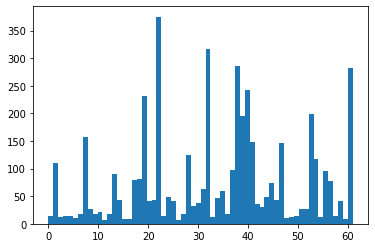

In [26]:
plt.hist(labels,len(set(labels)))
plt.show()

In [27]:
rand_signs = random.sample(range(0,len(labels)),6)
rand_signs

[3540, 2792, 3166, 4175, 4142, 1652]

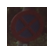

Forma:(87, 88, 3), min:23, max:111


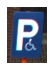

Forma:(115, 81, 3), min:0, max:255


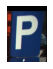

Forma:(315, 224, 3), min:0, max:250


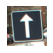

Forma:(132, 132, 3), min:10, max:255


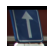

Forma:(212, 211, 3), min:0, max:255


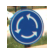

Forma:(148, 141, 3), min:13, max:255


In [28]:
for i in range(len(rand_signs)):
  temp_im = images[rand_signs[i]]

  plt.subplot(1,6,i+1)
  plt.axis("off")
  plt.imshow(temp_im)
  plt.subplots_adjust(wspace=0.5)
  plt.show()
  print(f"Forma:{temp_im.shape}, min:{temp_im.min()}, max:{temp_im.max()}")

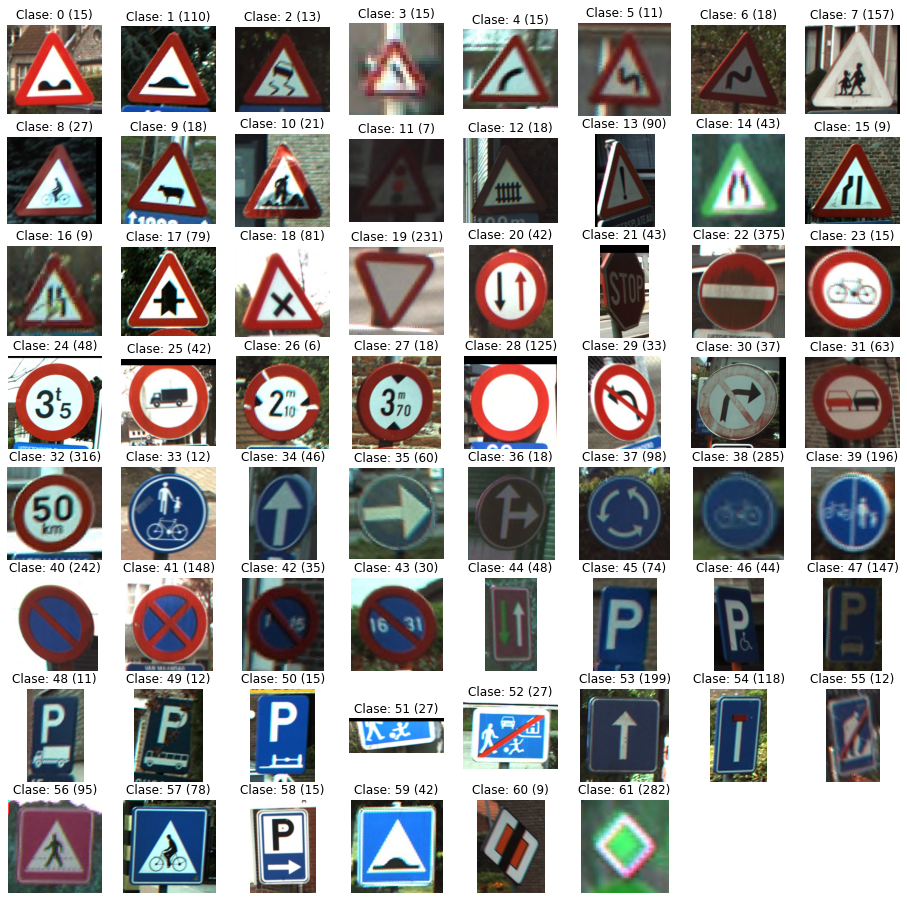

In [29]:
unique_labels = set(labels)
plt.figure(figsize=(16,16))
i = 1
for label in unique_labels:
  temp_im = images[list(labels).index(label)]
  plt.subplot(8,8,i)
  plt.axis("off")
  plt.title(f"Clase: {label} ({list(labels).count(label)})")
  i += 1
  plt.imshow(temp_im)
plt.show()

# Modelo de Red Neuronal con TensorFlow
* Las imágenes no todas son del mismo tamaño
* Hay 62 clases de imágenes (desde la 0 hasta la 61)
* La distribución de señales de tráfico no es uniforme (algunas salen más veces que otras)

In [30]:
w = 9999 
h = 9999
for image in images:
  if image.shape[0] < h:
    h = image.shape[0]
  if image.shape[1] < w:
    w = image.shape[1]
print(f"Tamaño mínimo: {h}x{w}")

Tamaño mínimo: 22x20


In [31]:
images30 = [transform.resize(image,(30,30)) for image in images]

In [32]:
images30[0]

array([[[0.20535948, 0.20320697, 0.13215686],
        [0.27947712, 0.29040523, 0.2027451 ],
        [0.21477124, 0.19254902, 0.11699346],
        ...,
        [0.19346405, 0.19285403, 0.10261438],
        [0.20528105, 0.21458824, 0.10614379],
        [0.18522876, 0.18869717, 0.10516776]],

       [[0.24954248, 0.25877124, 0.14397386],
        [0.27239216, 0.25945098, 0.172     ],
        [0.20849673, 0.18640523, 0.11764706],
        ...,
        [0.20326797, 0.20392157, 0.11359477],
        [0.20729412, 0.21513725, 0.11098039],
        [0.22405229, 0.24426144, 0.14922876]],

       [[0.23721133, 0.25067538, 0.12923747],
        [0.26771242, 0.25921569, 0.16901961],
        [0.2379085 , 0.21960784, 0.12396514],
        ...,
        [0.21045752, 0.21067538, 0.10196078],
        [0.20849673, 0.21019608, 0.12222222],
        [0.23830065, 0.25206972, 0.14810458]],

       ...,

       [[0.26379085, 0.25764706, 0.16169935],
        [0.31281046, 0.28261438, 0.17124183],
        [0.28300654, 0

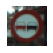

Forma:(30, 30, 3), min:0.04555555555555514, max:0.996078431372549


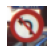

Forma:(30, 30, 3), min:0.11480392156862741, max:0.996078431372549


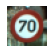

Forma:(30, 30, 3), min:0.020522875816993413, max:0.996078431372549


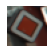

Forma:(30, 30, 3), min:0.03398692810457507, max:0.9882352941176471


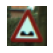

Forma:(30, 30, 3), min:0.052528322440087184, max:0.9921568627450981


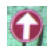

Forma:(30, 30, 3), min:0.1637908496732028, max:0.996078431372549


In [33]:
rand_signs = random.sample(range(0,len(labels)),6)

for i in range(len(rand_signs)):
  temp_im = images30[rand_signs[i]]

  plt.subplot(1,6,i+1)
  plt.axis("off")
  plt.imshow(temp_im)
  plt.subplots_adjust(wspace=0.5)
  plt.show()
  print(f"Forma:{temp_im.shape}, min:{temp_im.min()}, max:{temp_im.max()}")

In [34]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

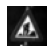

Forma:(30, 30), min:0.08877450980392157, max:0.5445840168845316


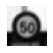

Forma:(30, 30), min:0.06966522352941176, max:0.9518421751633988


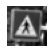

Forma:(30, 30), min:0.10214960784313737, max:0.6209735947712426


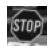

Forma:(30, 30), min:0.05416578431372543, max:0.9410940352941178


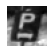

Forma:(30, 30), min:0.18641690196078436, max:0.4090290784313725


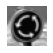

Forma:(30, 30), min:0.16757957254901956, max:0.8415216071895442


In [35]:
rand_signs = random.sample(range(0,len(labels)),6)

for i in range(len(rand_signs)):
  temp_im = images30[rand_signs[i]]

  plt.subplot(1,6,i+1)
  plt.axis("off")
  plt.imshow(temp_im,cmap="gray")
  plt.subplots_adjust(wspace=0.5)
  plt.show()
  print(f"Forma:{temp_im.shape}, min:{temp_im.min()}, max:{temp_im.max()}")

In [36]:
x = tf.placeholder(dtype = tf.float32,shape=[None,30,30])
y = tf.placeholder(dtype = tf.int32,shape=[None])

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat,62,tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))

train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

final_pred = tf.argmax(logits,1)

accuracy = tf.reduce_mean(tf.cast(final_pred,tf.float32))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [37]:
images_flat

<tf.Tensor 'Flatten/flatten/Reshape:0' shape=(?, 900) dtype=float32>

In [38]:
logits

<tf.Tensor 'fully_connected/Relu:0' shape=(?, 62) dtype=float32>

In [39]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [40]:
final_pred

<tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>

In [54]:
tf.set_random_seed(1234)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(601):  
  _,accuracy_val = sess.run([train_opt,accuracy], feed_dict={x: images30, y: list(labels)})
  #_,loss_val = sess.run([train_opt,loss], feed_dict={x: images30, y: list(labels)})
  if i % 50 == 0:
    print(f"EPOCH {i}")
    print(f"Accuracy: {accuracy_val}")
    #print(f"Loss: {loss_val}")
  #print(f"Fin del Epoch {i}")

EPOCH 0
Accuracy: 21.839344024658203
EPOCH 50
Accuracy: 33.43278503417969
EPOCH 100
Accuracy: 34.18491744995117
EPOCH 150
Accuracy: 34.17879867553711
EPOCH 200
Accuracy: 34.15978240966797
EPOCH 250
Accuracy: 34.11781311035156
EPOCH 300
Accuracy: 34.11103820800781
EPOCH 350
Accuracy: 33.995628356933594
EPOCH 400
Accuracy: 33.93289566040039
EPOCH 450
Accuracy: 33.944698333740234
EPOCH 500
Accuracy: 33.93311309814453
EPOCH 550
Accuracy: 33.85530090332031
EPOCH 600
Accuracy: 33.800655364990234


# Evaluación de la red neuronal

In [55]:
sample_idx = random.sample(range(len(images30)),40)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [56]:
sample_labels

[19,
 38,
 32,
 19,
 22,
 56,
 40,
 7,
 20,
 35,
 40,
 22,
 40,
 32,
 1,
 22,
 52,
 39,
 38,
 34,
 44,
 40,
 31,
 32,
 22,
 34,
 61,
 43,
 22,
 56,
 38,
 18,
 18,
 56,
 48,
 38,
 61,
 39,
 19,
 1]

In [57]:
prediction = sess.run([final_pred],feed_dict={x:sample_images})[0]

In [58]:
prediction

array([19, 38, 32, 19, 22, 57, 61,  7, 20, 35, 41, 22, 22, 32,  1, 22, 54,
       39, 38, 19, 61, 22, 32, 32, 22, 19, 61, 41, 22, 57, 38, 28,  1, 57,
       47, 38, 22, 39, 19,  1])

In [59]:
sample_labels

[19,
 38,
 32,
 19,
 22,
 56,
 40,
 7,
 20,
 35,
 40,
 22,
 40,
 32,
 1,
 22,
 52,
 39,
 38,
 34,
 44,
 40,
 31,
 32,
 22,
 34,
 61,
 43,
 22,
 56,
 38,
 18,
 18,
 56,
 48,
 38,
 61,
 39,
 19,
 1]

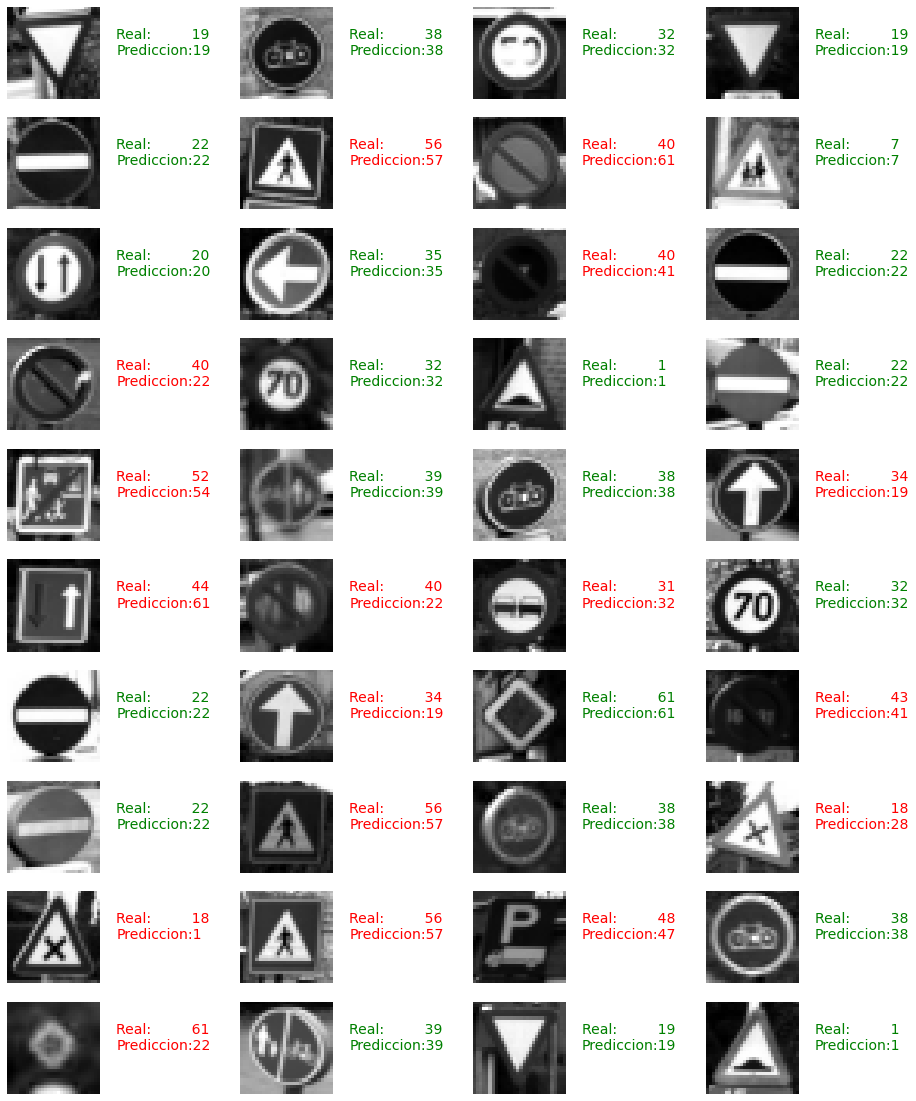

In [60]:
plt.figure(figsize=(16,20))
for i in range(len(sample_images)):
  truth = sample_labels[i]
  pred = prediction[i]
  plt.subplot(10,4,i+1)
  plt.axis("off")
  color = "green" if truth == pred else "red"
  plt.text(35,15, f"Real:         {truth}\nPrediccion:{pred}", fontsize=14,color=color)
  plt.imshow(sample_images[i],cmap="gray")
plt.show()

In [48]:
test_images, test_labels = load_ml_data(test_data_dir)

In [49]:
test_images30 = [transform.resize(im,(30,30)) for im in test_images]

In [50]:
len(test_images30)

2520

In [51]:
test_images30 = rgb2gray(np.array(test_images30))

In [61]:
prediction = sess.run([final_pred],feed_dict={x:test_images30})[0]

In [62]:
match_count = sum([int(l0==lp) for l0, lp in zip(test_labels, prediction)])
match_count

1571

In [63]:
acc = match_count / len(test_labels)*100
print(f"Eficacia de la red neuronal: {acc:.3f}")

Eficacia de la red neuronal: 62.341
